First thing first, go edit your damaged photos by drawing using white color ink on your damaged area for masking purpose.
OpenCV will find white area then fill with suitable color.

In [ ]:
!pip install opencv-contrib-python==4.5.3.56

     |████████████████████████████████| 56.1 MB 199 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


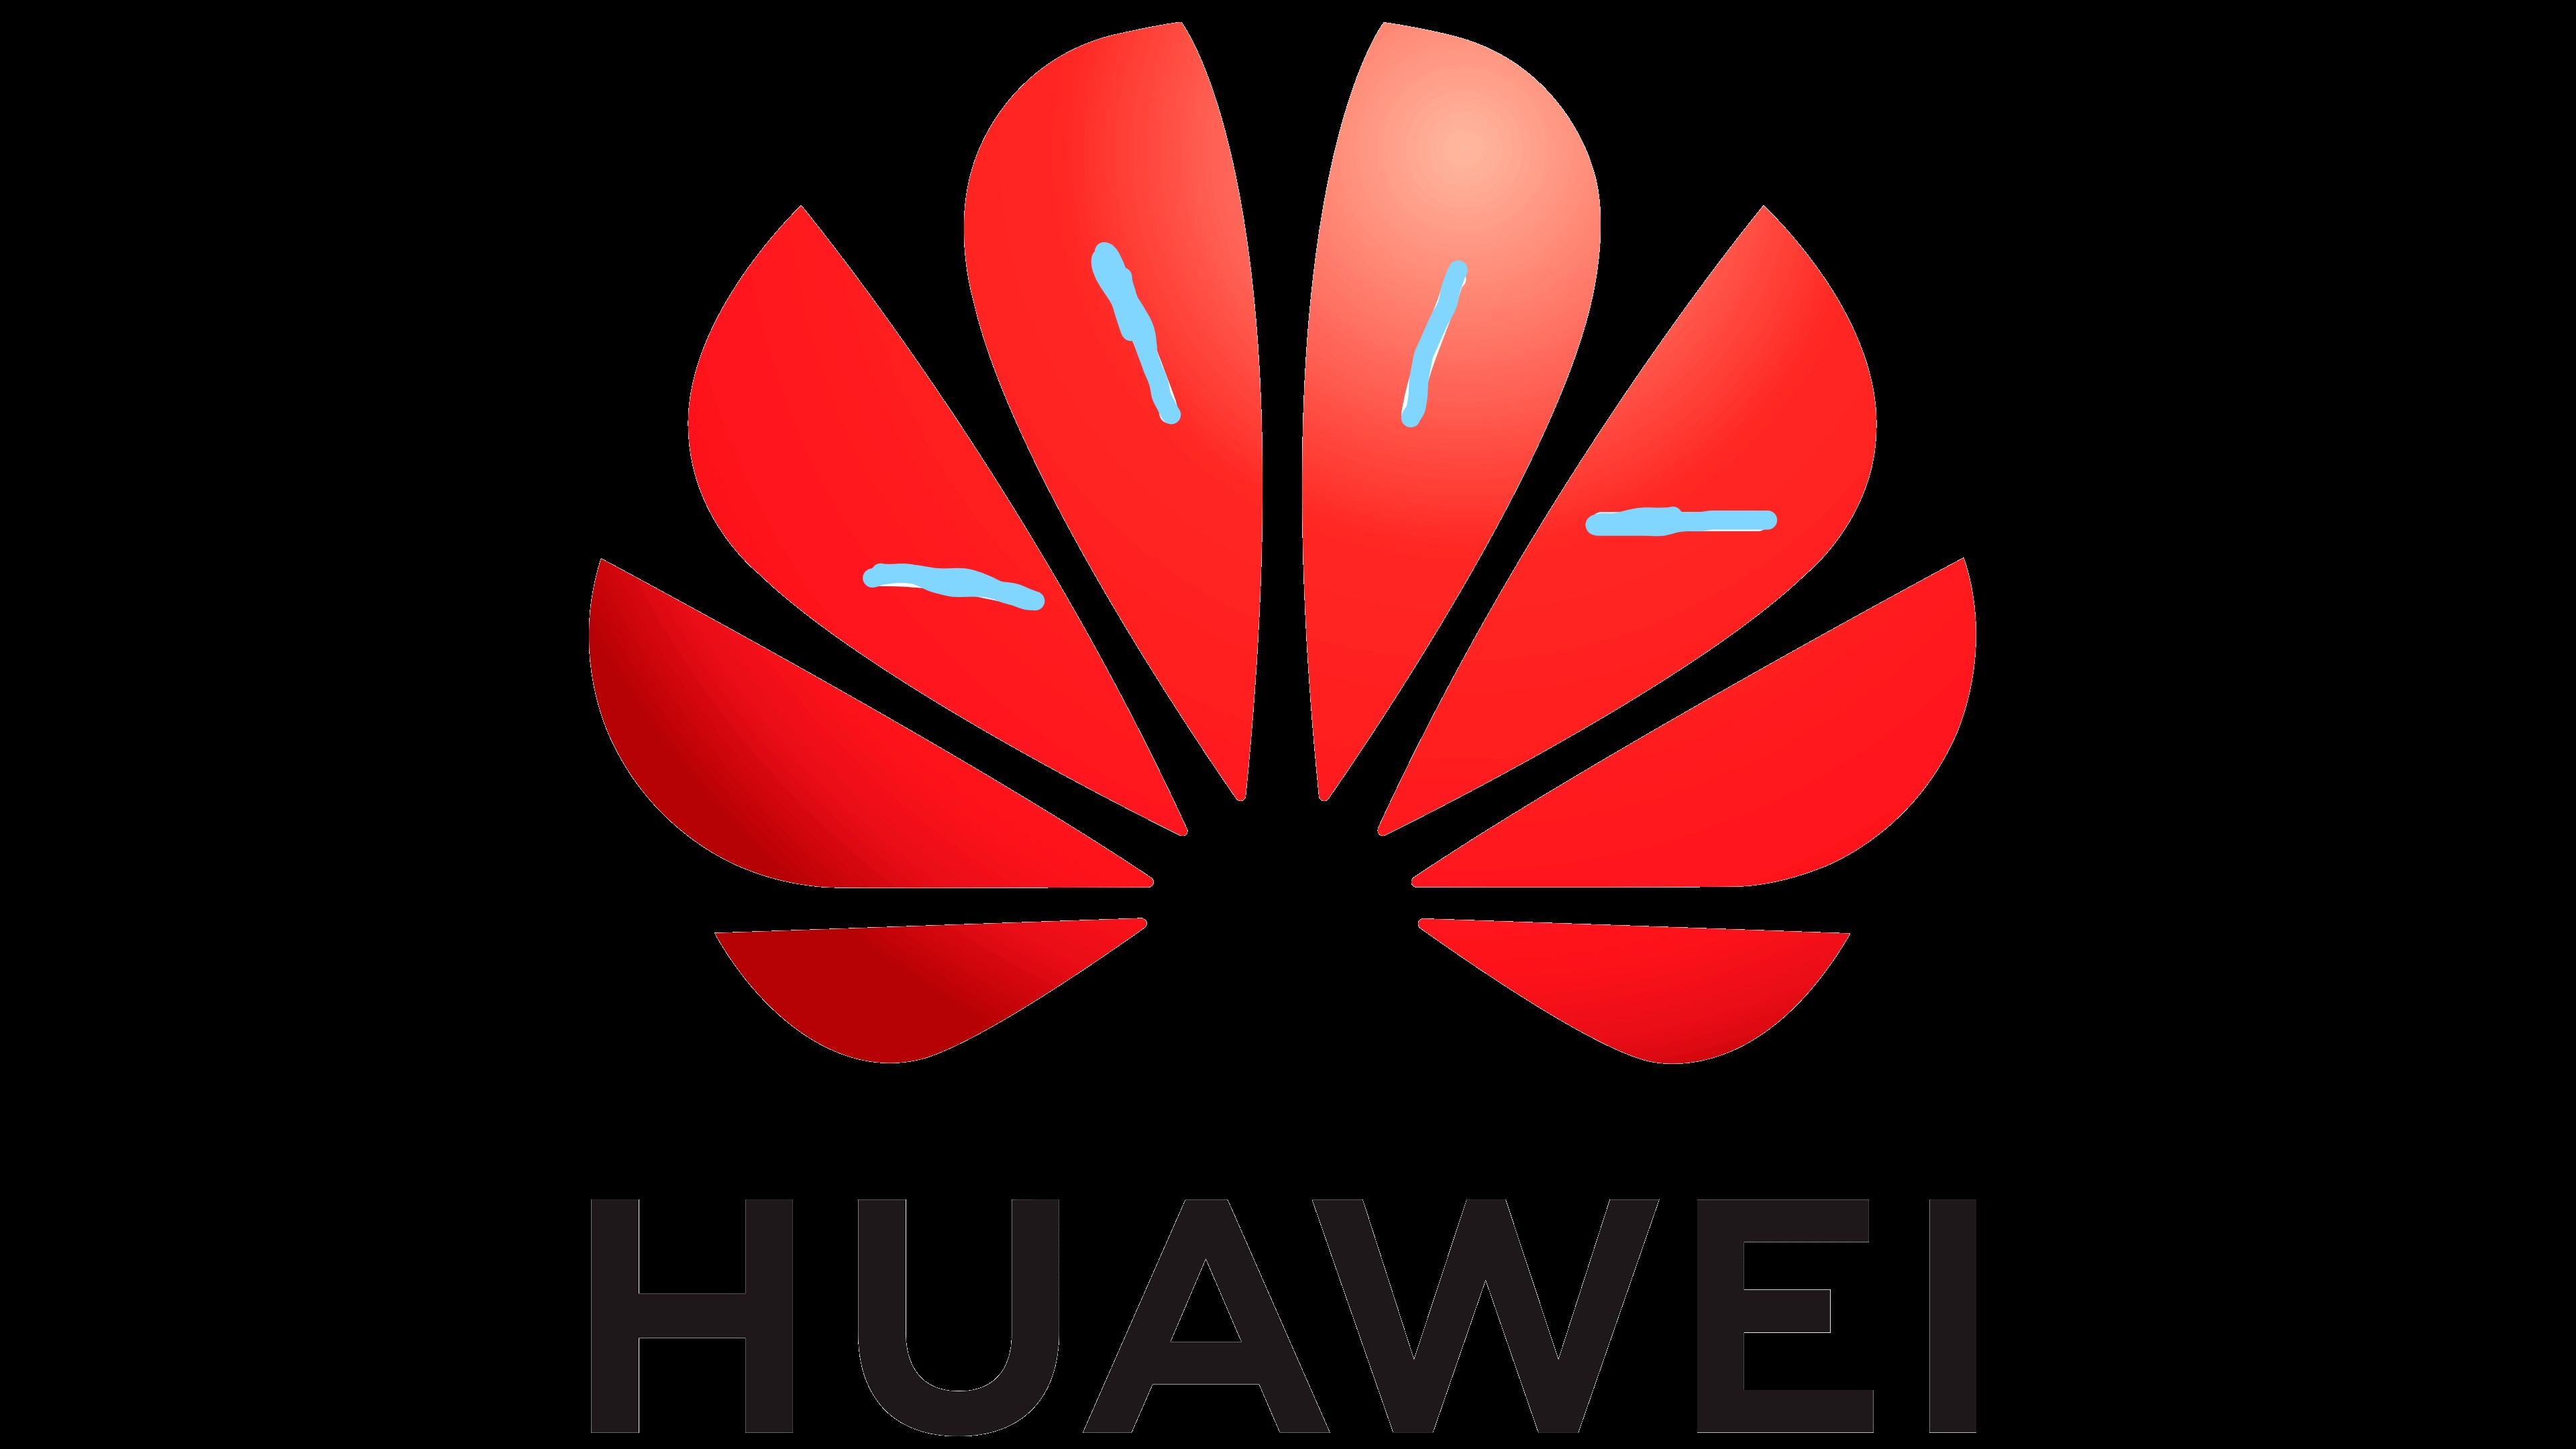

In [ ]:
import cv2

damaged = cv2.imread("/content/Damaged_logo.jpg")

from google.colab.patches import cv2_imshow

cv2_imshow(damaged)

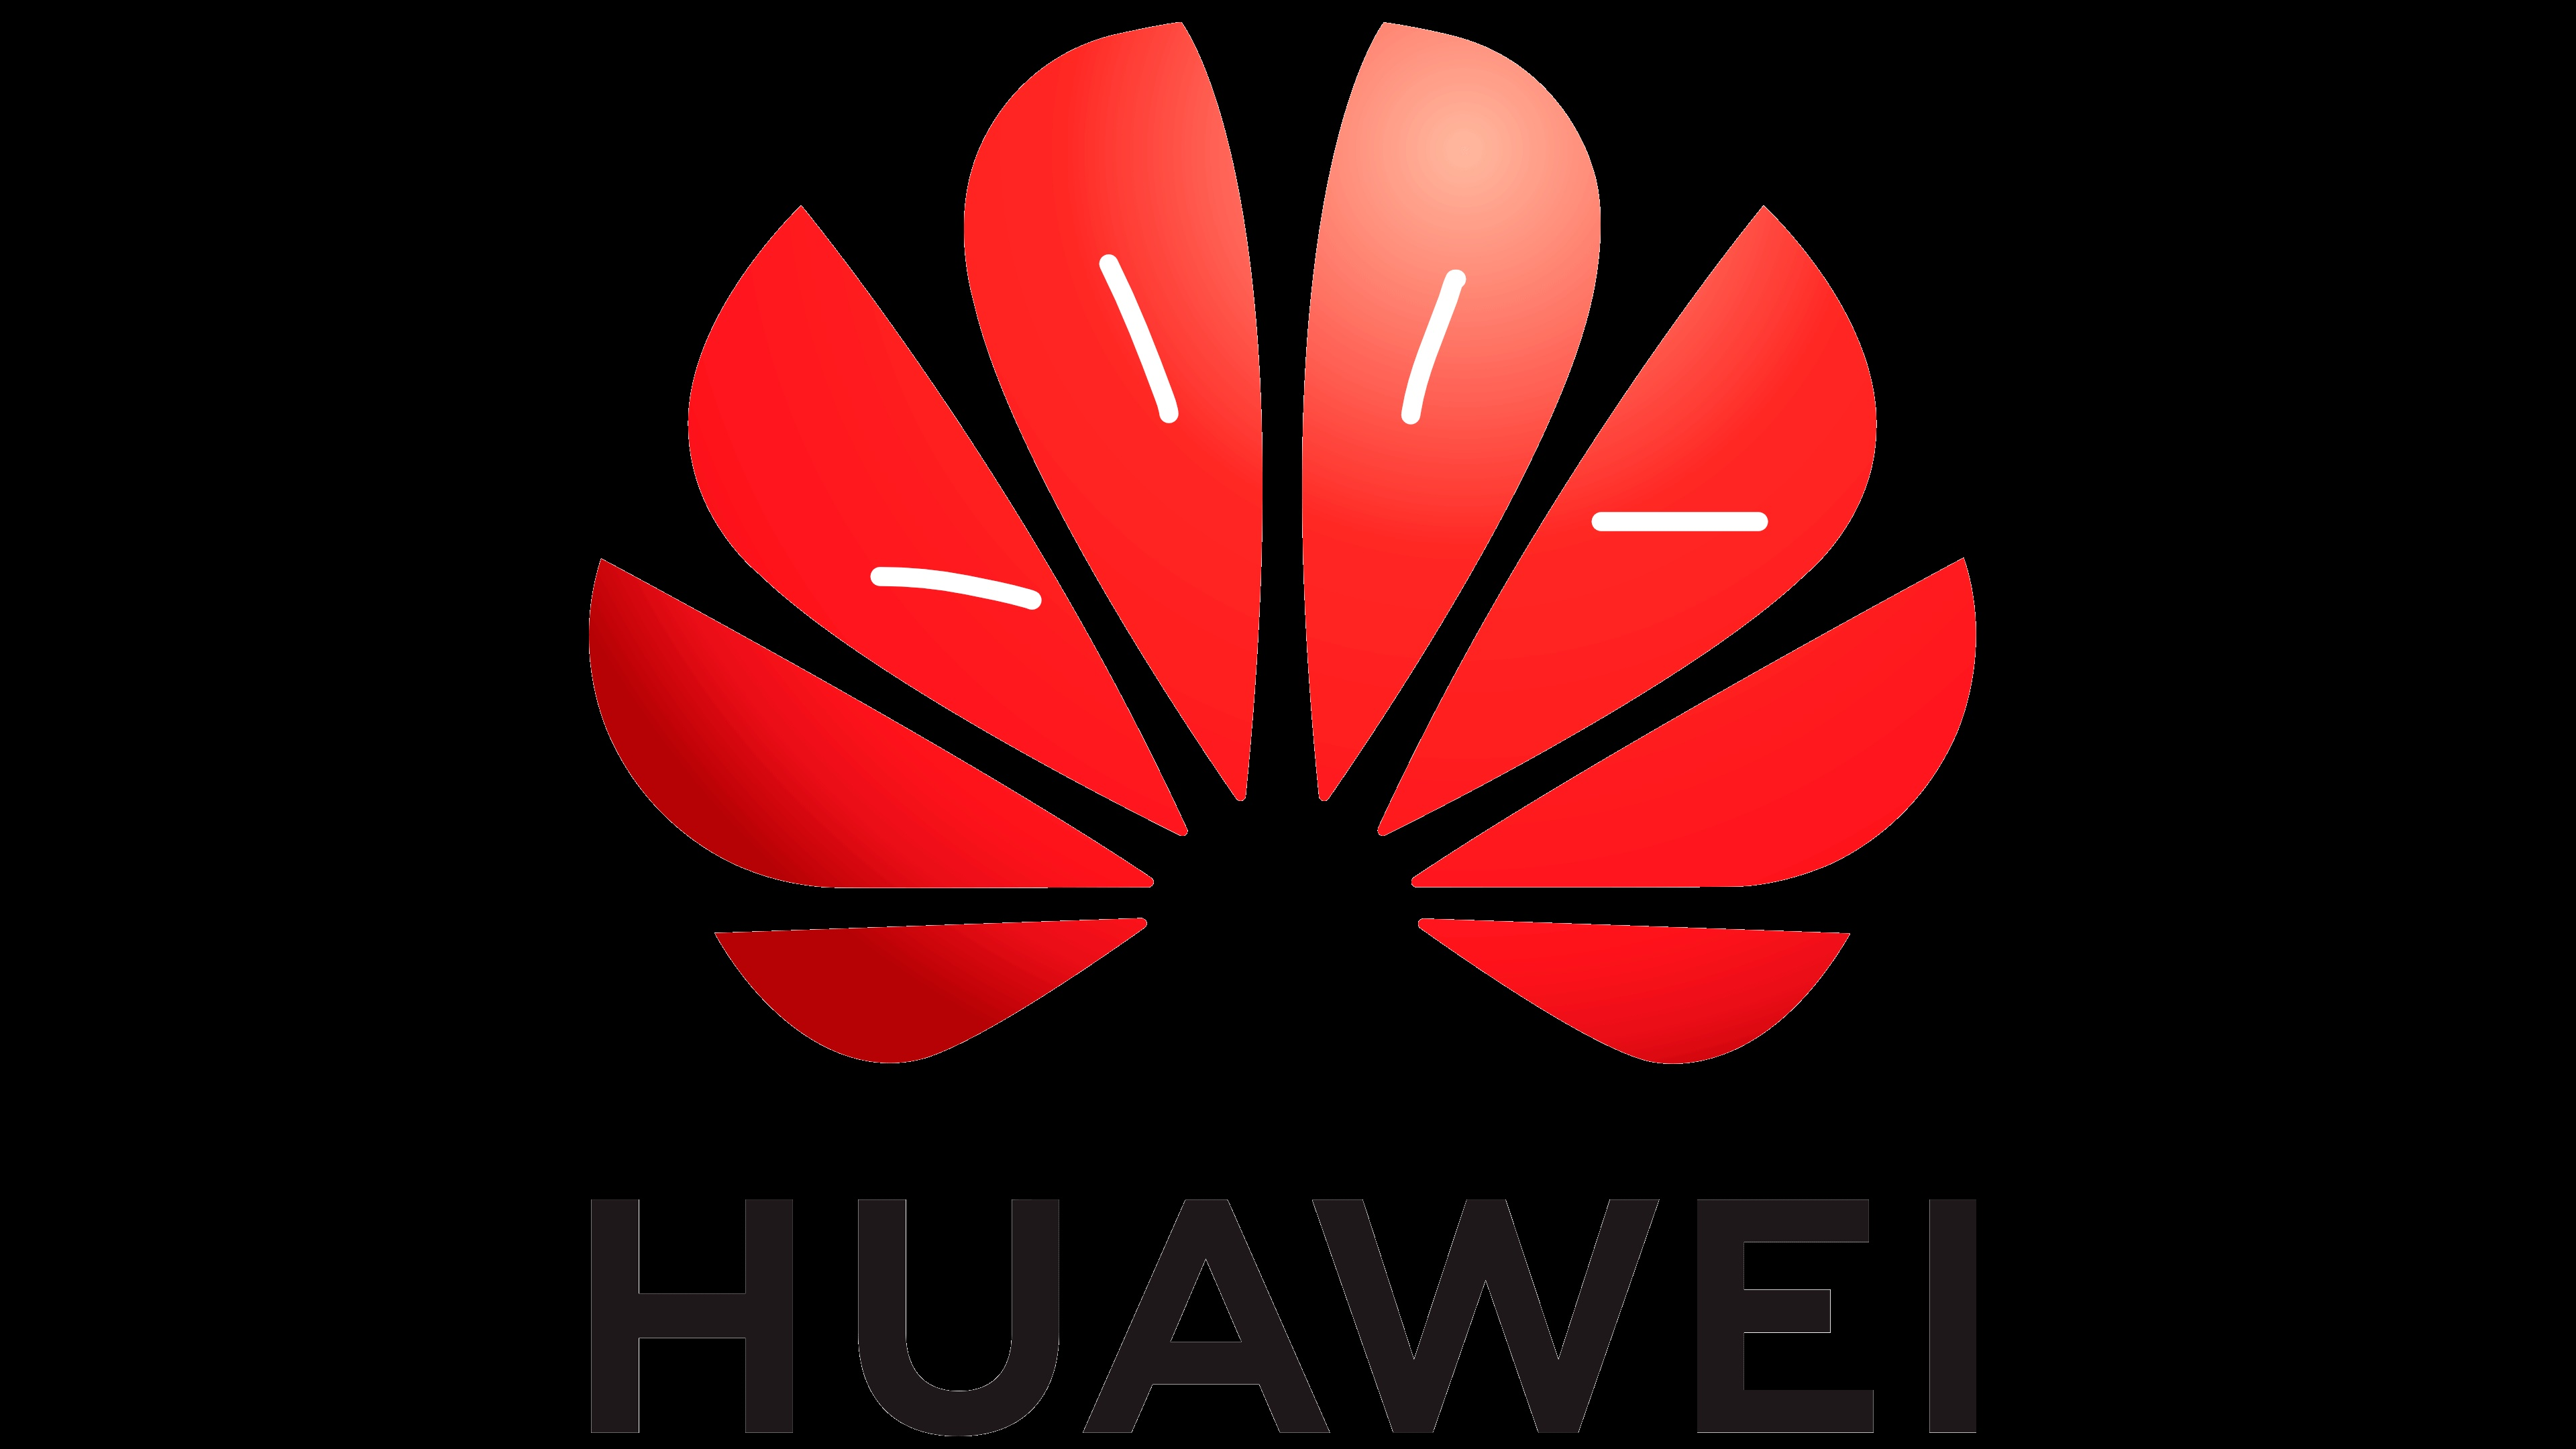

In [3]:


damaged_mask = cv2.imread("/content/Damaged_logo_mask.jpg")

cv2_imshow(damaged_mask)

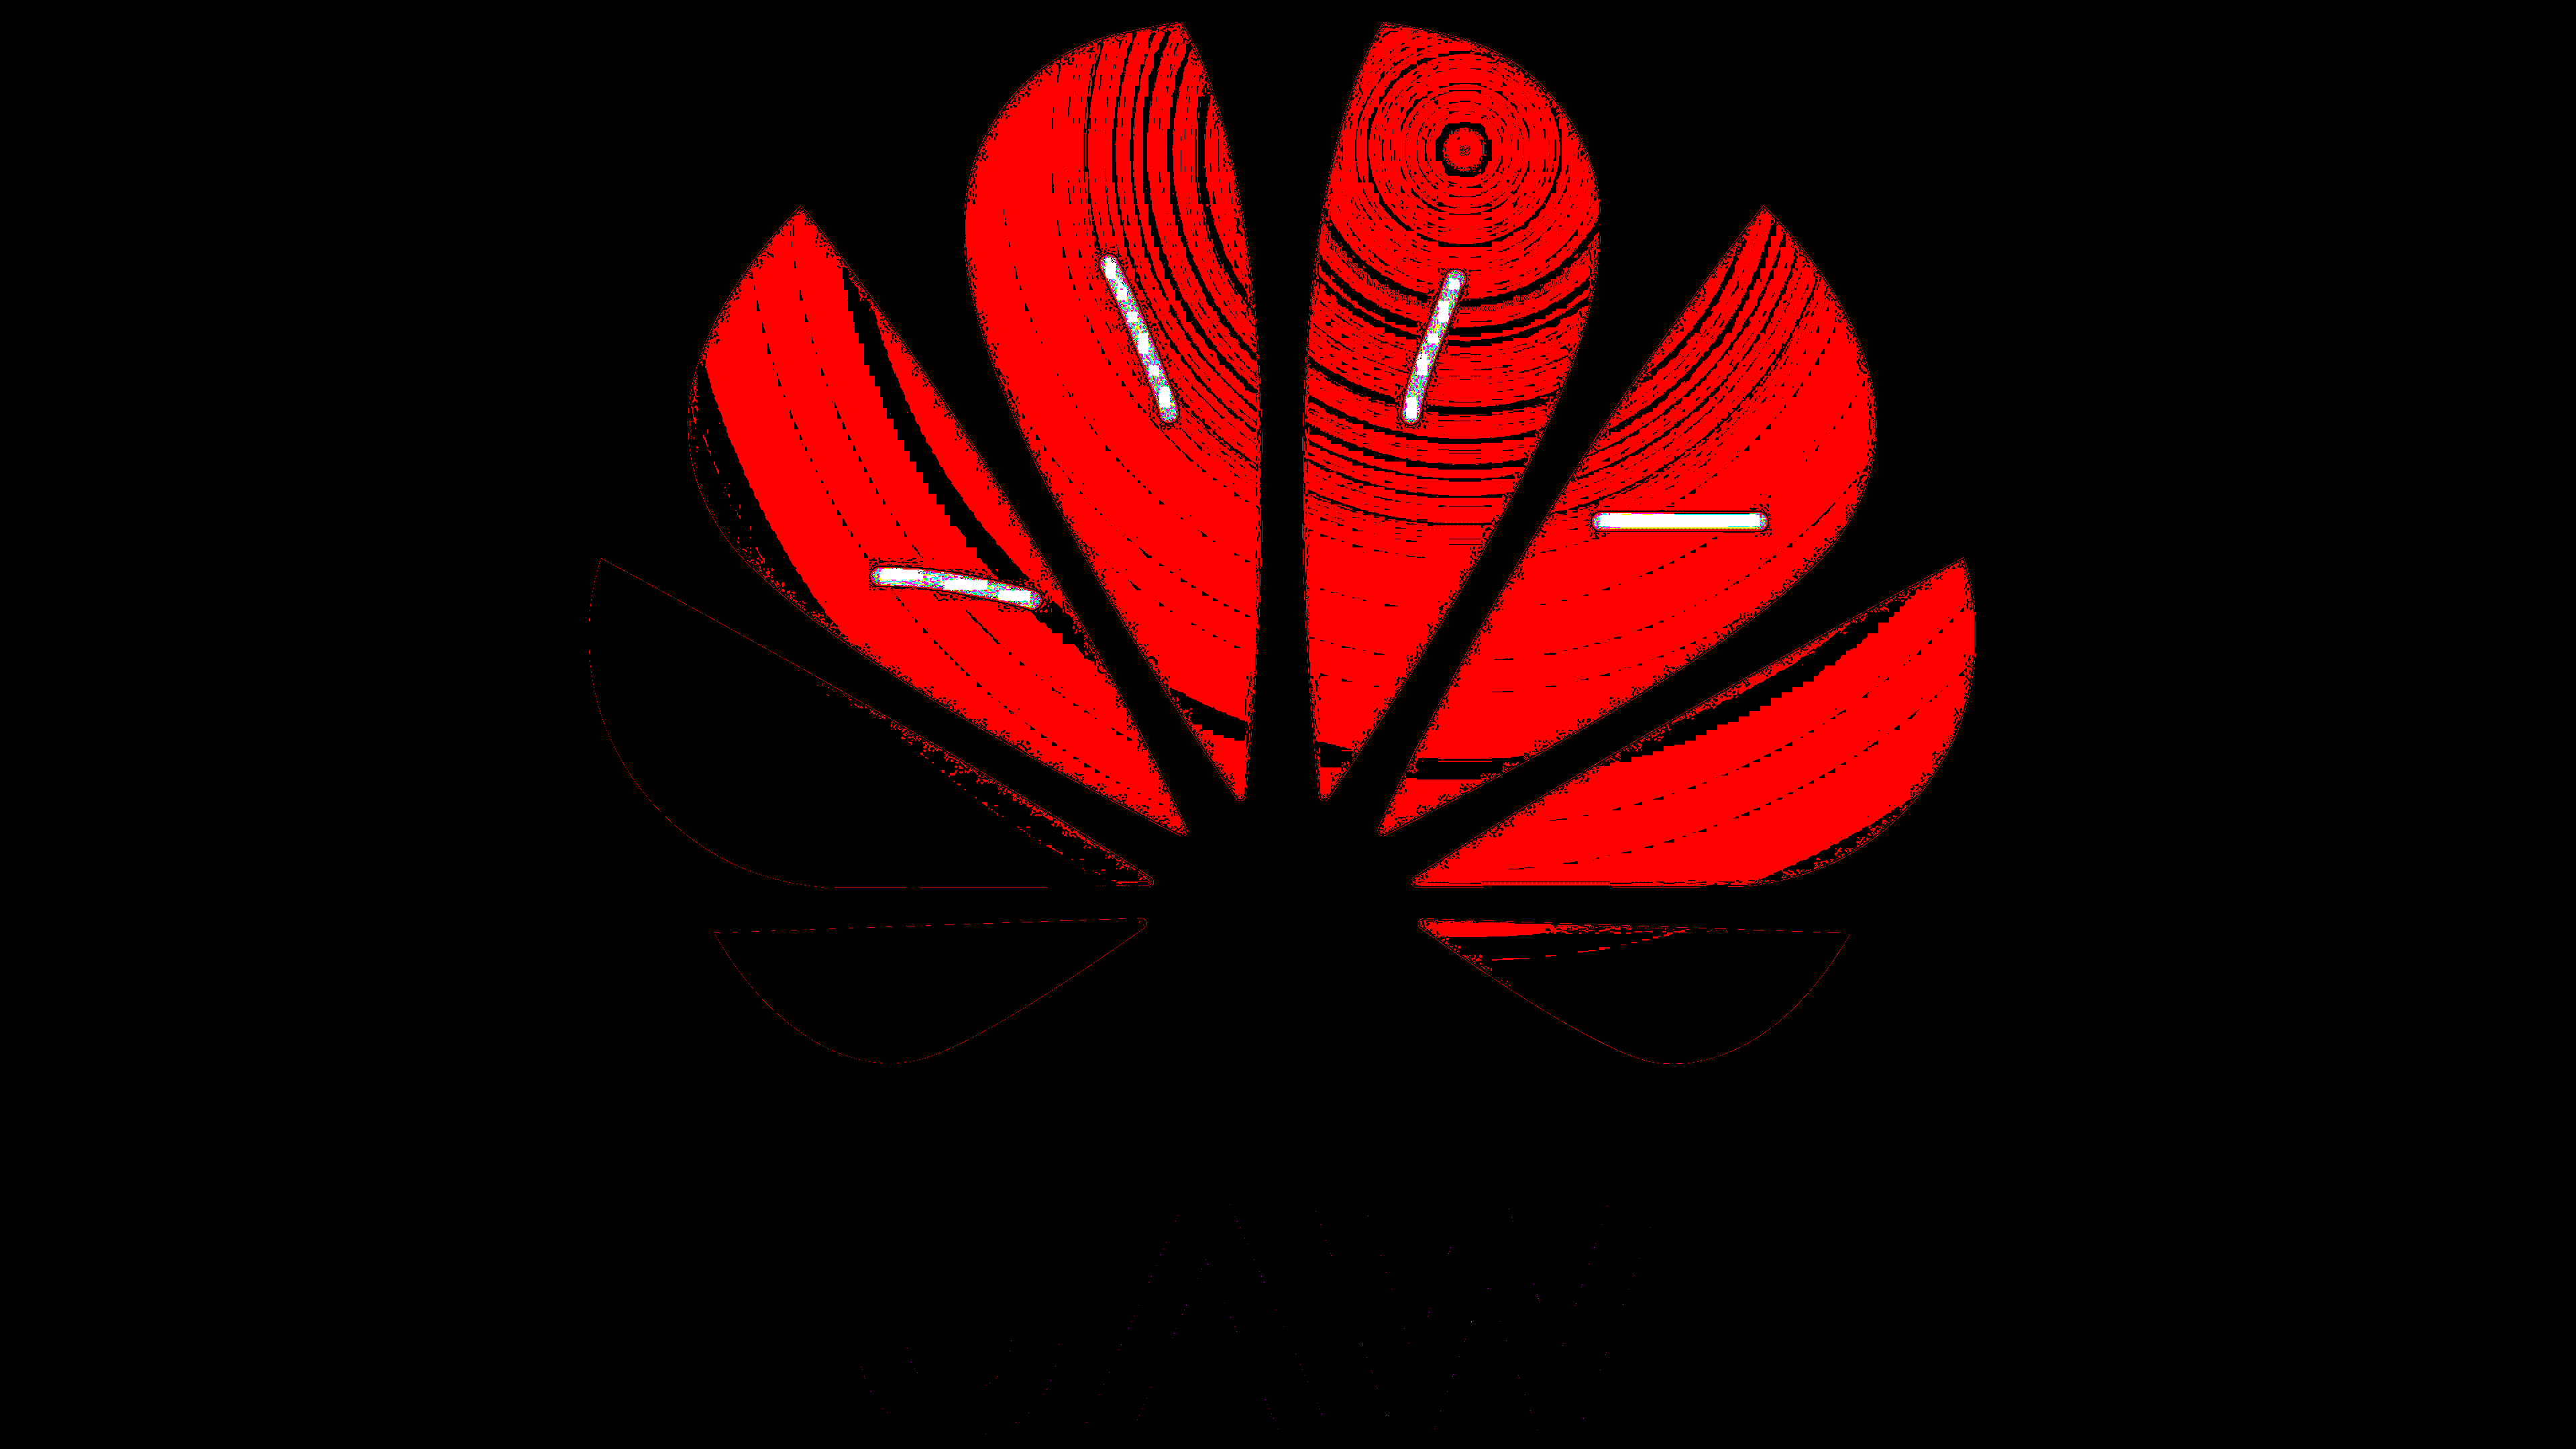

In [4]:
#this for detection of the white color that we masked the damage

threshold_value = 254 #any pixel less than 254 will be convert into 255
output_value = 255

ret, thresh = cv2.threshold(damaged_mask, threshold_value, output_value,cv2.THRESH_BINARY)

cv2_imshow(thresh)

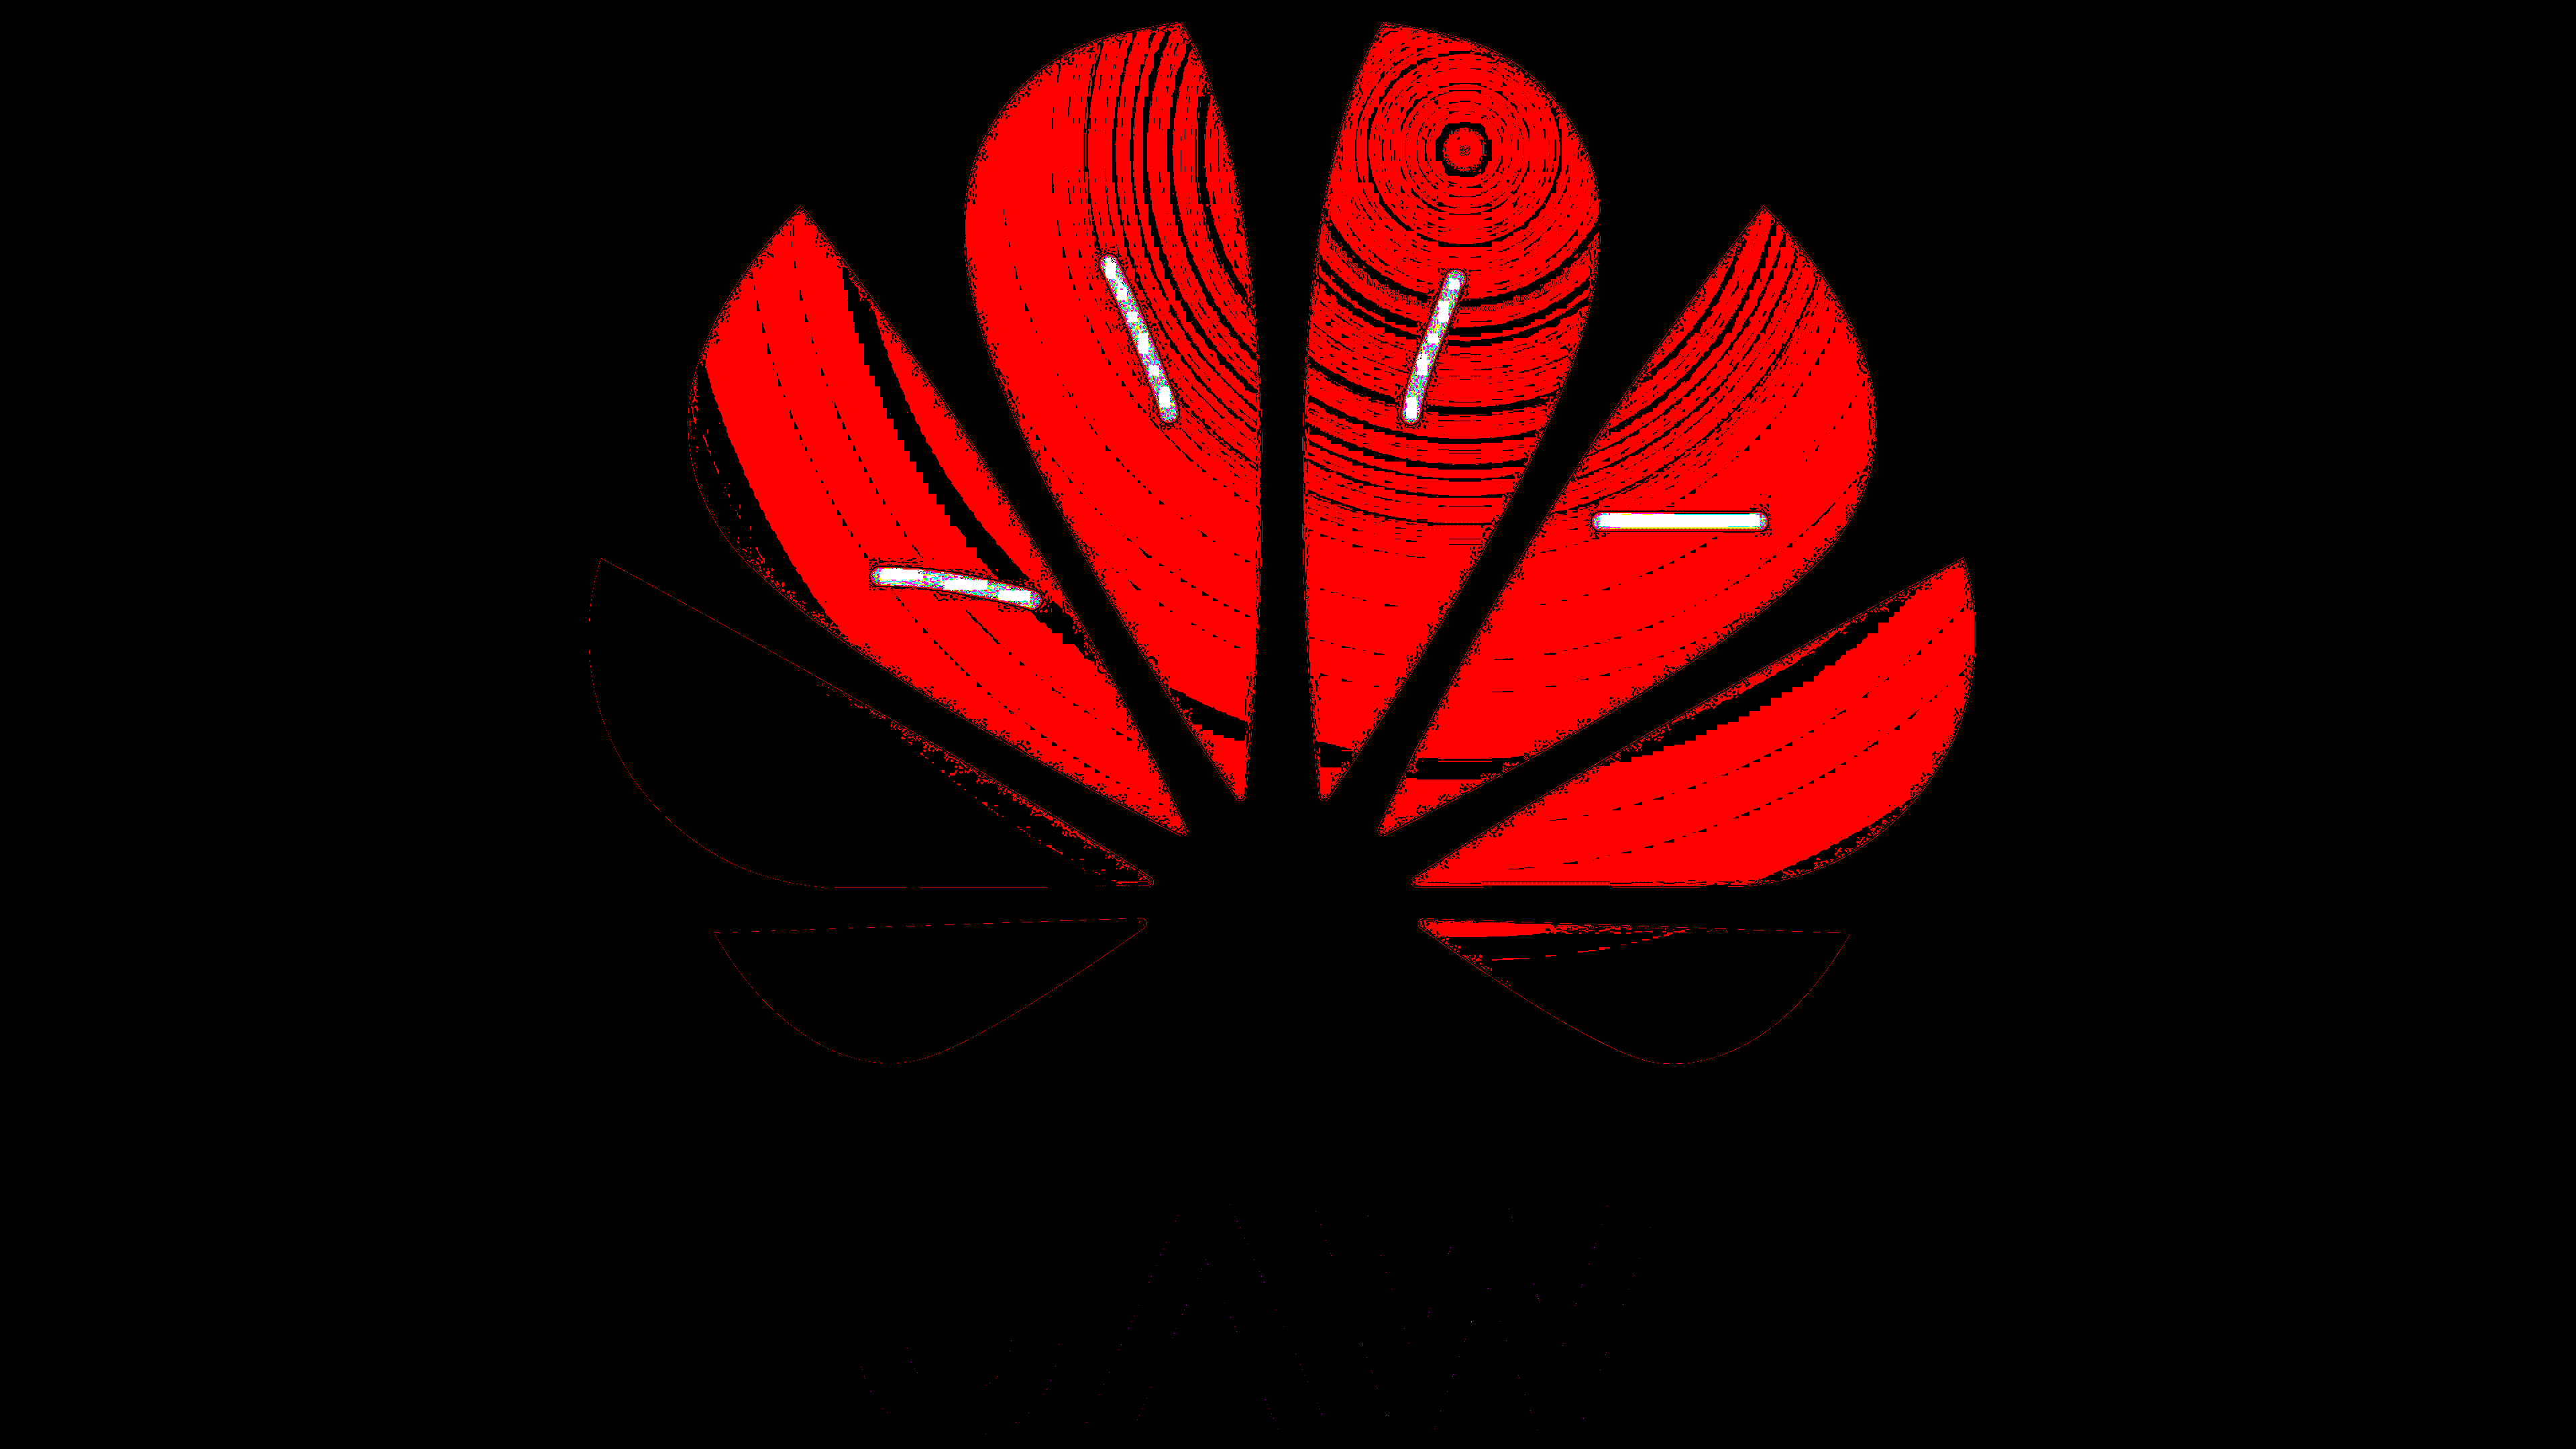

In [9]:
import numpy

kernel = numpy.ones((7,7), numpy.uint8)

#mask = cv2.dilate(thresh,kernel, iterations = 1)

mask = thresh

cv2_imshow(mask)

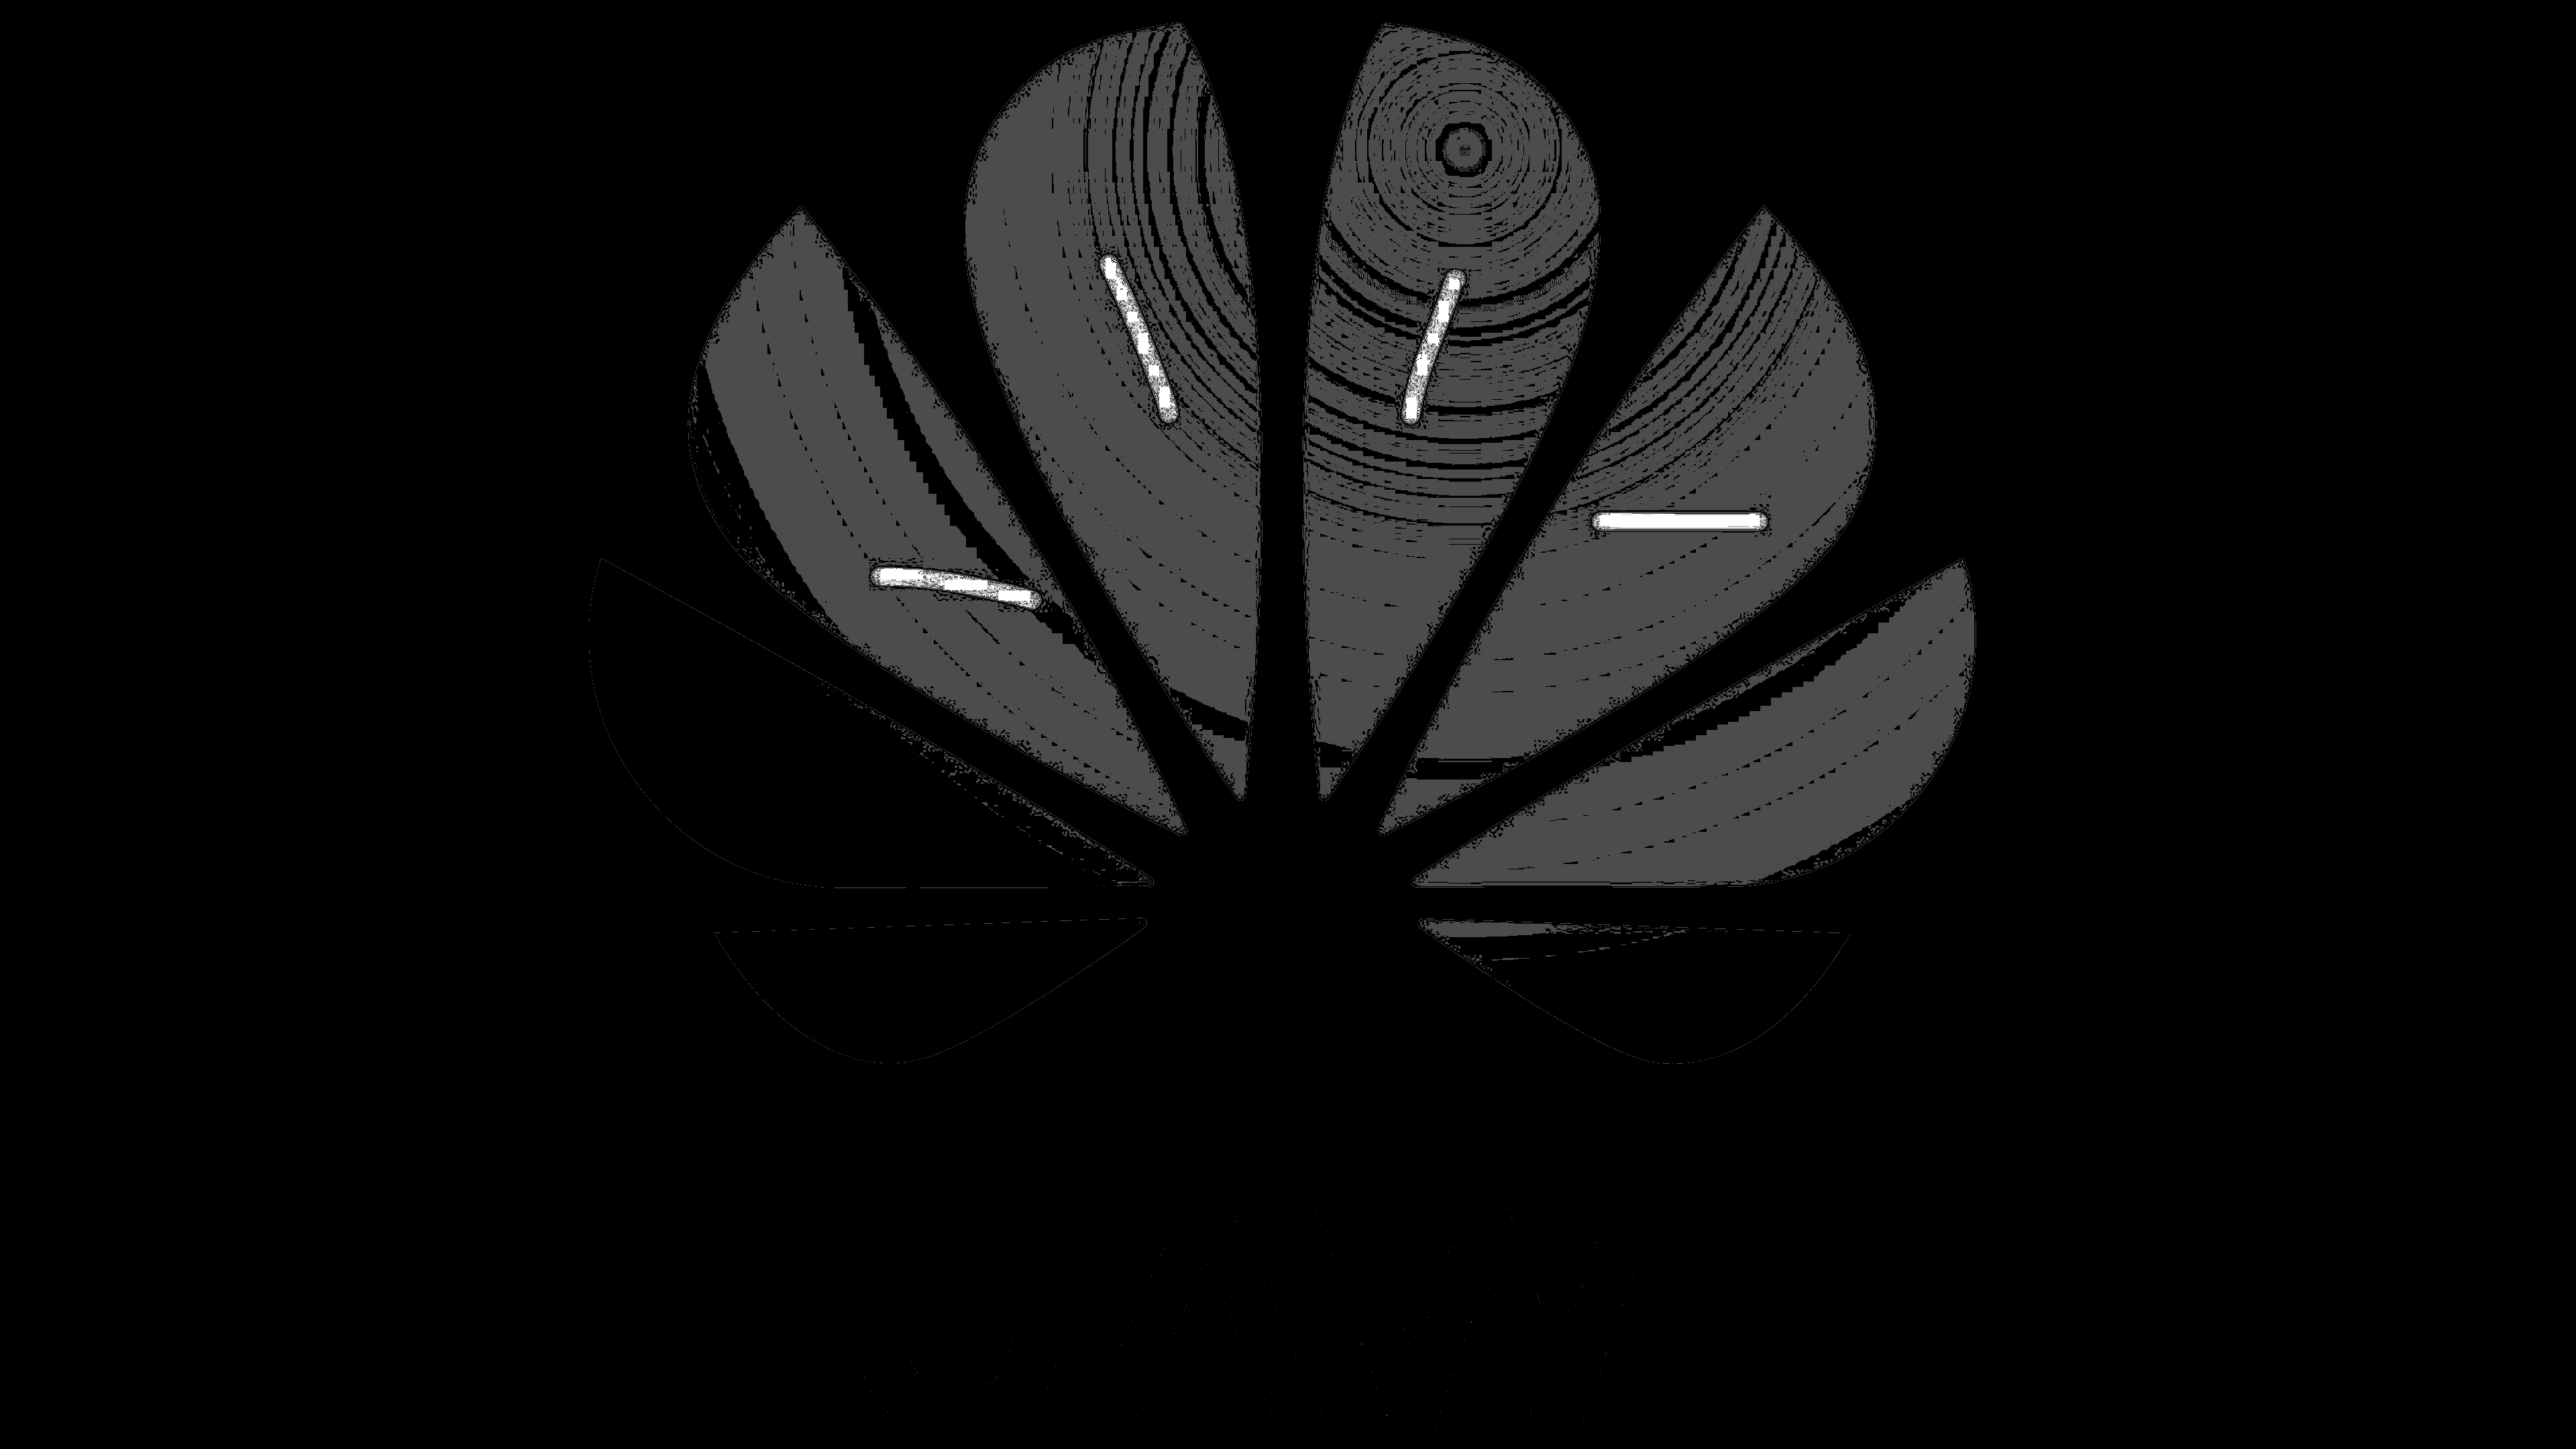

In [10]:
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_mask)

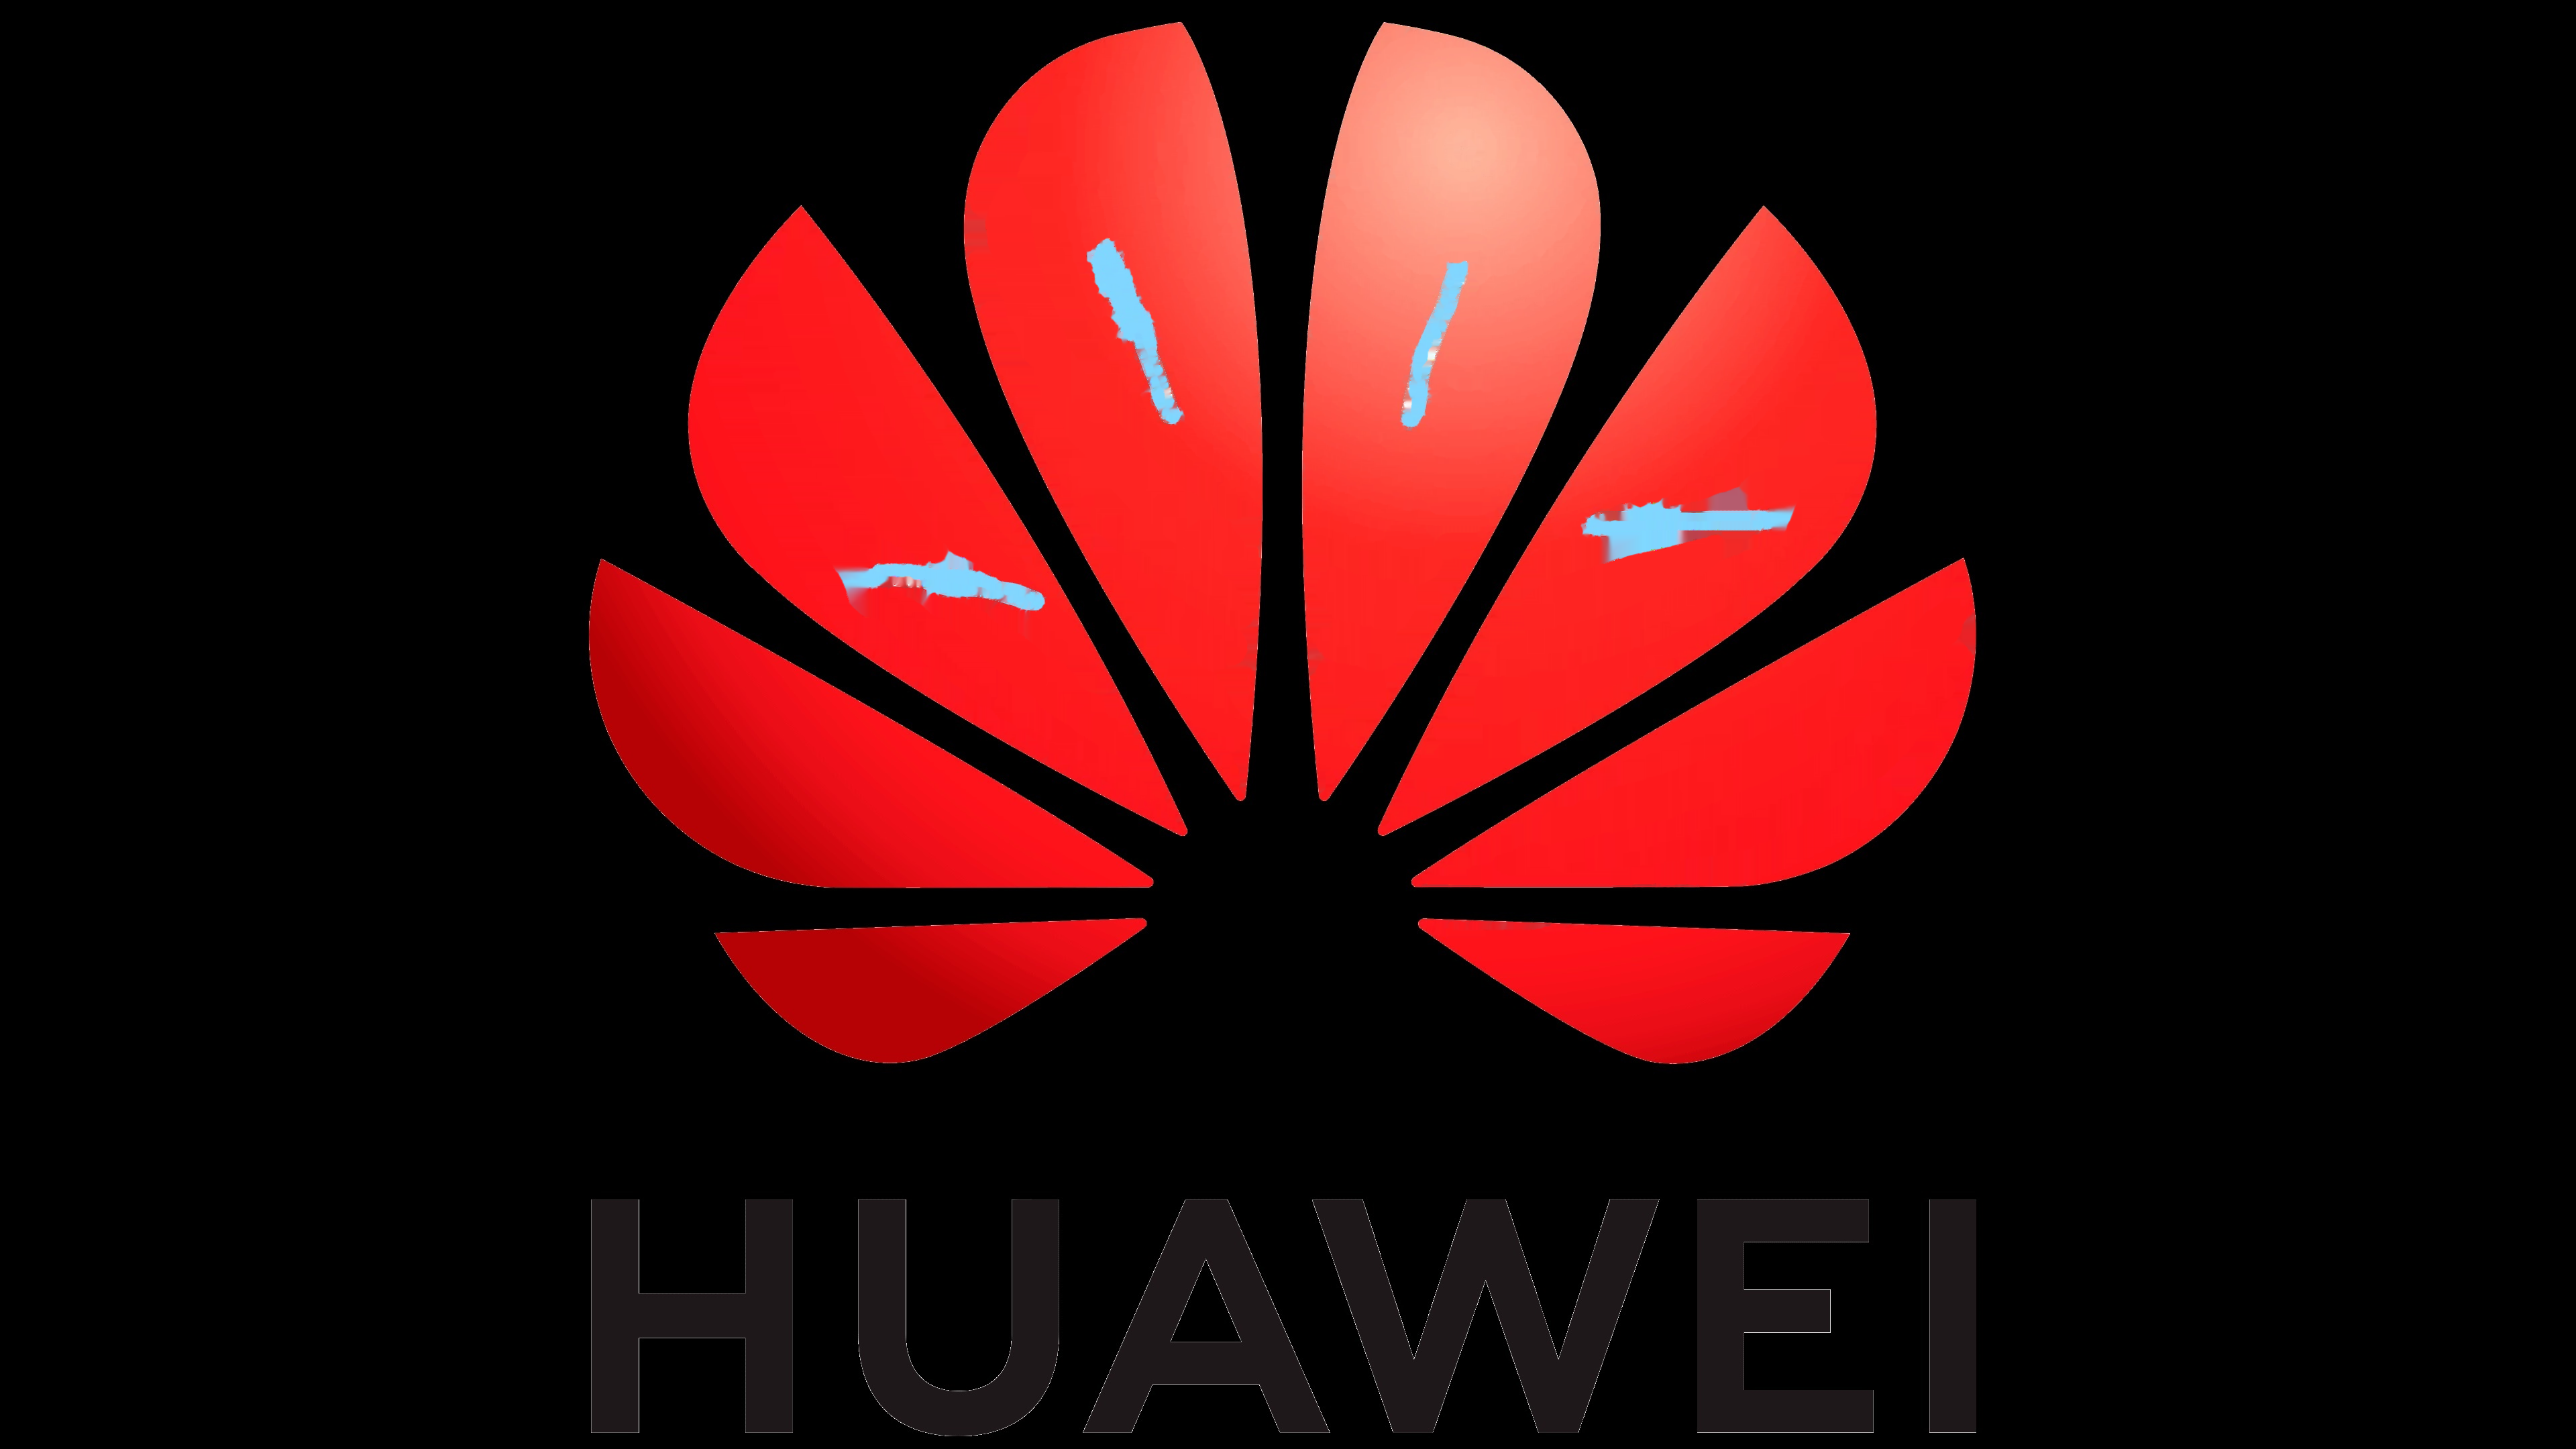

In [11]:
inpaint_radius = 3

restored = cv2.inpaint(damaged, gray_mask, inpaint_radius, cv2.INPAINT_NS)

cv2_imshow(restored)

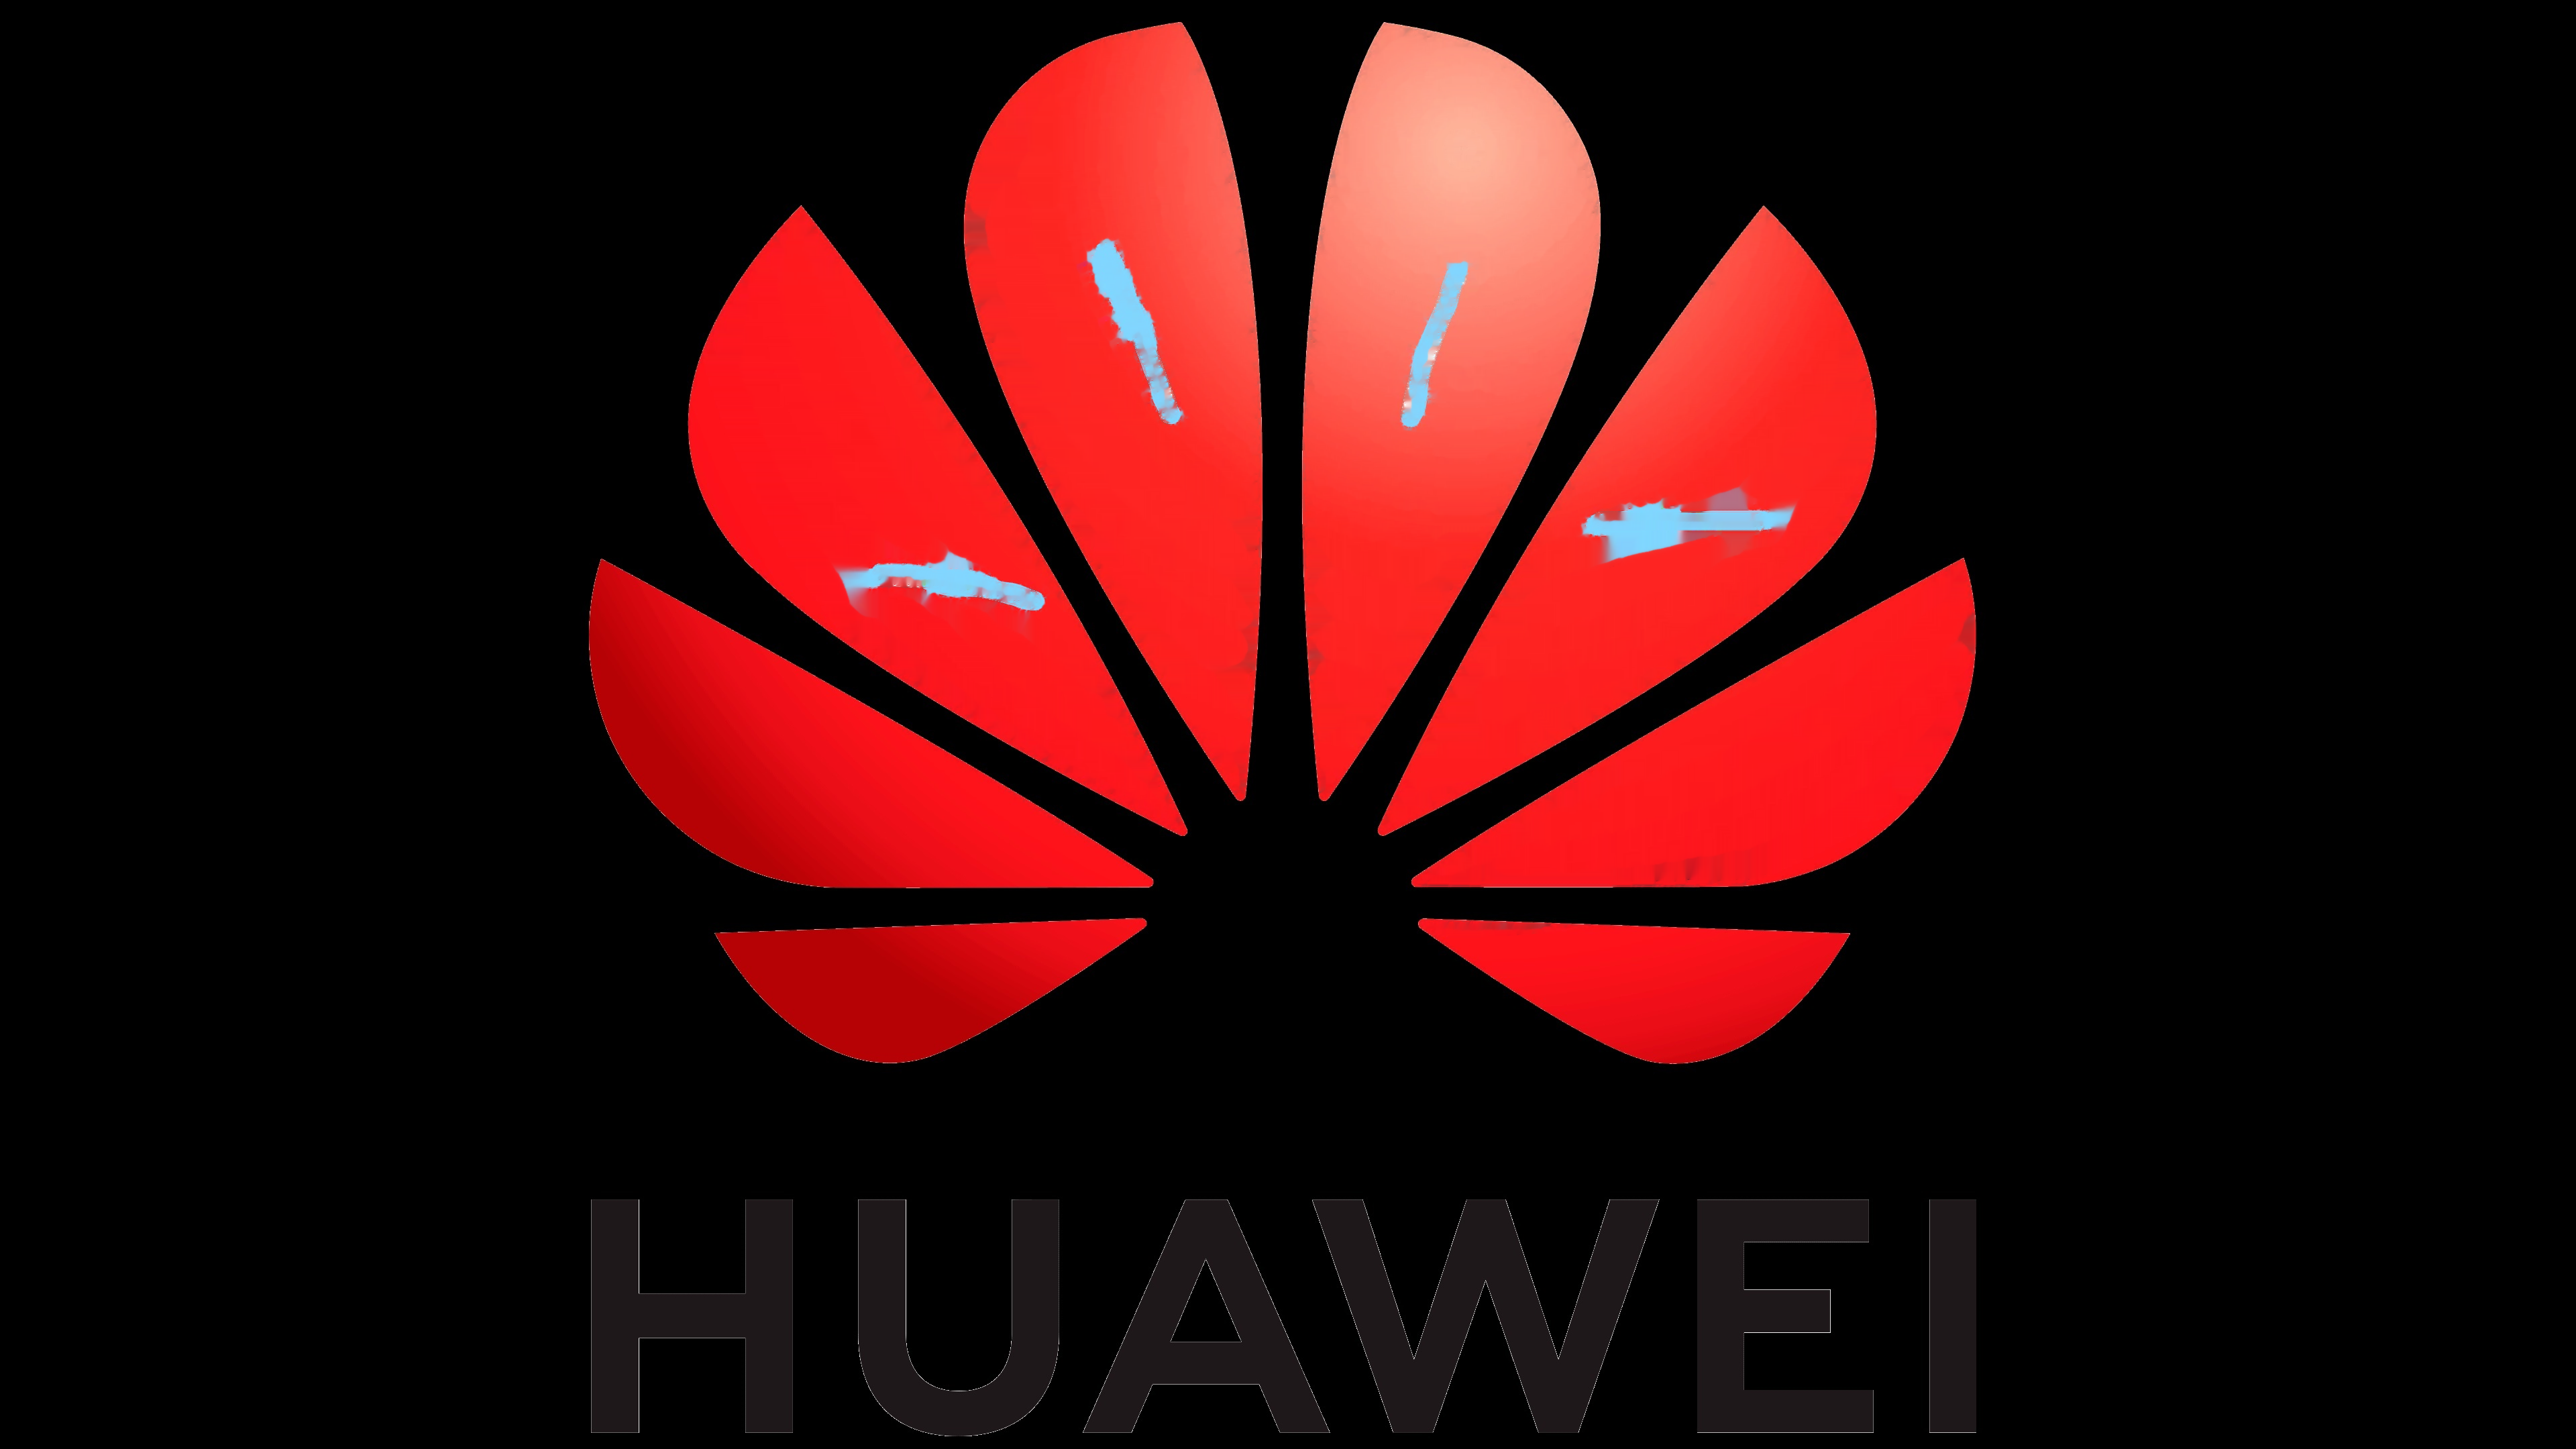

In [12]:
inpaint_radius = 19 # as this increase, the longer the running time take

restored = cv2.inpaint(damaged, gray_mask, inpaint_radius, cv2.INPAINT_NS)

cv2_imshow(restored)